In [3]:
import os
import platform

# Paths for macOS and Windows
paths = {
    "Darwin": "Dropbox/大三下/PythonCourse/Econometrics/8_OOP_II",
    "Windows": "C:\\Users\\iamja\\Dropbox\\大三下\\PythonCourse\\Econometrics\\8_OOP_II"
}

# Get current OS, set new path based on OS, or default if not macOS/Windows
new_path = paths.get(platform.system(), os.getcwd())

# Result without try-except block for simplicity
result_simplified = f"Intended working directory: {new_path}"
result_simplified

'Intended working directory: Dropbox/大三下/PythonCourse/Econometrics/8_OOP_II'

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

An example is a Python list, which not only stores data but also knows how to sort itself, etc.

In [3]:
x = [1, 5, 4]
x.sort()
x

[1, 4, 5]

As we now know, ``sort`` is a function that is “part of” the list object — and hence called a method.

In [4]:
x = [1, 5, 4]
x.sort()
x.__class__

list

In [5]:
dir(x)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [7]:
class Consumer:

    def __init__(self, w):
        "Initialize consumer with w dollars of wealth"
        self.wealth = w

    def earn(self, y):
        "The consumer earns y dollars"
        self.wealth += y

    def spend(self, x):
        "The consumer spends x dollars if feasible"
        new_wealth = self.wealth - x
        if new_wealth < 0:
            print("Insufficent funds")
        else:
            self.wealth = new_wealth

### __init__, earn, spend are three methods 

In [8]:
c1 = Consumer(10)  # Create instance with initial wealth 10
c1.spend(5)
c1.wealth

5

In [9]:
c1.earn(15)
c1.spend(100)

Insufficent funds


In [10]:
c1 = Consumer(10)
c2 = Consumer(12)
c2.spend(4)
c2.wealth

8

In [11]:
c2.__dict__

{'wealth': 8}

In [12]:
print(Consumer.__dict__)  # Show __dict__ attribute of class object

{'__module__': '__main__', '__init__': <function Consumer.__init__ at 0x0000026CFA006FC0>, 'earn': <function Consumer.earn at 0x0000026CFA007060>, 'spend': <function Consumer.spend at 0x0000026CFA007100>, '__dict__': <attribute '__dict__' of 'Consumer' objects>, '__weakref__': <attribute '__weakref__' of 'Consumer' objects>, '__doc__': None}


### Ex: Solow Growth Model

In [13]:
class Solow:
    r"""
    Implements the Solow growth model with the update rule

        k_{t+1} = [(s z k^α_t) + (1 - δ)k_t] /(1 + n)

    """
    def __init__(self, n=0.05,  # population growth rate
                       s=0.25,  # savings rate
                       δ=0.1,   # depreciation rate
                       α=0.3,   # share of labor
                       z=2.0,   # productivity
                       k=1.0):  # current capital stock

        self.n, self.s, self.δ, self.α, self.z = n, s, δ, α, z
        self.k = k

    def h(self):
        "Evaluate the h function"
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # Apply the update rule
        return (s * z * self.k**α + (1 - δ) * self.k) / (1 + n)

    def update(self):
        "Update the current state (i.e., the capital stock)."
        self.k =  self.h()

    def steady_state(self):
        "Compute the steady state value of capital."
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # Compute and return steady state
        return ((s * z) / (n + δ))**(1 / (1 - α))

    def generate_sequence(self, t):
        "Generate and return a time series of length t"
        path = []
        for i in range(t):
            path.append(self.k)
            self.update()
        return path

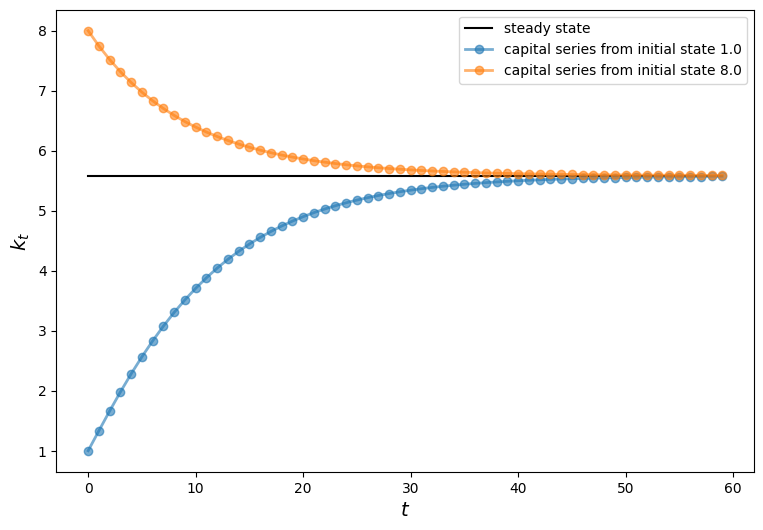

In [14]:
s1 = Solow()
s2 = Solow(k=8.0)

T = 60
fig, ax = plt.subplots(figsize=(9, 6))

# Plot the common steady state value of capital
ax.plot([s1.steady_state()]*T, 'k-', label='steady state')

# Plot time series for each economy
for s in s1, s2:
    lb = f'capital series from initial state {s.k}'
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)

ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$k_t$', fontsize=14)
ax.legend()
plt.show()

### Ex: A Market

In [15]:
from scipy.integrate import quad

class Market:

    def __init__(self, ad, bd, az, bz, tax):
        """
        Set up market parameters.  All parameters are scalars.  See
        https://lectures.quantecon.org/py/python_oop.html for interpretation.

        """
        self.ad, self.bd, self.az, self.bz, self.tax = ad, bd, az, bz, tax
        if ad < az:
            raise ValueError('Insufficient demand.')

    def price(self):
        "Compute equilibrium price"
        return  (self.ad - self.az + self.bz * self.tax) / (self.bd + self.bz)

    def quantity(self):
        "Compute equilibrium quantity"
        return  self.ad - self.bd * self.price()

    def consumer_surp(self):
        "Compute consumer surplus"
        # == Compute area under inverse demand function == #
        integrand = lambda x: (self.ad / self.bd) - (1 / self.bd) * x
        area, error = quad(integrand, 0, self.quantity())
        return area - self.price() * self.quantity()

    def producer_surp(self):
        "Compute producer surplus"
        #  == Compute area above inverse supply curve, excluding tax == #
        integrand = lambda x: -(self.az / self.bz) + (1 / self.bz) * x
        area, error = quad(integrand, 0, self.quantity())
        return (self.price() - self.tax) * self.quantity() - area

    def taxrev(self):
        "Compute tax revenue"
        return self.tax * self.quantity()

    def inverse_demand(self, x):
        "Compute inverse demand"
        return self.ad / self.bd - (1 / self.bd)* x

    def inverse_supply(self, x):
        "Compute inverse supply curve"
        return -(self.az / self.bz) + (1 / self.bz) * x + self.tax

    def inverse_supply_no_tax(self, x):
        "Compute inverse supply curve without tax"
        return -(self.az / self.bz) + (1 / self.bz) * x

In [16]:
baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params)
print("equilibrium price = ", m.price())

equilibrium price =  18.5


In [17]:
print("consumer surplus = ", m.consumer_surp())

consumer surplus =  33.0625


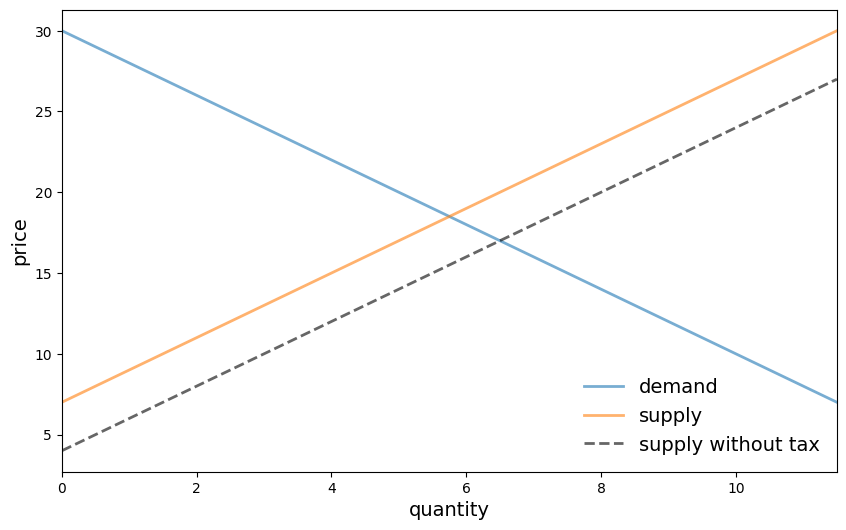

In [18]:
# Baseline ad, bd, az, bz, tax
baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params)

q_max = m.quantity() * 2
q_grid = np.linspace(0.0, q_max, 100)
pd = m.inverse_demand(q_grid)
ps = m.inverse_supply(q_grid)
psno = m.inverse_supply_no_tax(q_grid)

fig, ax = plt.subplots()
ax.plot(q_grid, pd, lw=2, alpha=0.6, label='demand')
ax.plot(q_grid, ps, lw=2, alpha=0.6, label='supply')
ax.plot(q_grid, psno, '--k', lw=2, alpha=0.6, label='supply without tax')
ax.set_xlabel('quantity', fontsize=14)
ax.set_xlim(0, q_max)
ax.set_ylabel('price', fontsize=14)
ax.legend(loc='lower right', frameon=False, fontsize=14)
plt.show()

In [19]:
def deadw(m):
    "Computes deadweight loss for market m."
    # == Create analogous market with no tax == #
    m_no_tax = Market(m.ad, m.bd, m.az, m.bz, 0)
    # == Compare surplus, return difference == #
    surp1 = m_no_tax.consumer_surp() + m_no_tax.producer_surp()
    surp2 = m.consumer_surp() + m.producer_surp() + m.taxrev()
    return surp1 - surp2

In [20]:
baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params)
deadw(m)  # Show deadweight loss

1.125

### Ex. Chaos

$$x_{t+1}=rx_t(1-x_t)$$

In [21]:
class Chaos:
  """
  Models the dynamical system :math:`x_{t+1} = r x_t (1 - x_t)`
  """
  def __init__(self, x0, r):
      """
      Initialize with state x0 and parameter r
      """
      self.x, self.r = x0, r

  def update(self):
      "Apply the map to update state."
      self.x =  self.r * self.x *(1 - self.x)

  def generate_sequence(self, n):
      "Generate and return a sequence of length n."
      path = []
      for i in range(n):
          path.append(self.x)
          self.update()
      return path

In [22]:
ch = Chaos(0.1, 4.0)     # x0 = 0.1 and r = 0.4
ch.generate_sequence(5)  # First 5 iterates

[0.1, 0.36000000000000004, 0.9216, 0.28901376000000006, 0.8219392261226498]

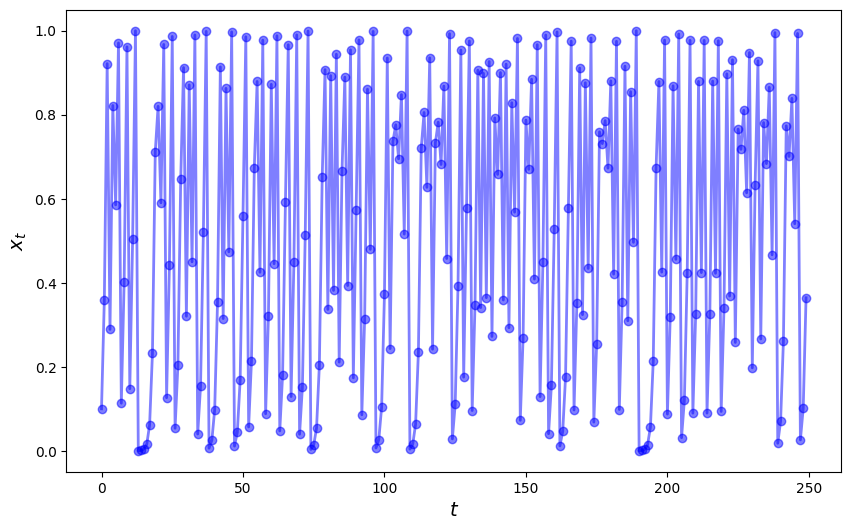

In [23]:
ch = Chaos(0.1, 4.0)
ts_length = 250

fig, ax = plt.subplots()
ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$x_t$', fontsize=14)
x = ch.generate_sequence(ts_length)
ax.plot(range(ts_length), x, 'bo-', alpha=0.5, lw=2, label='$x_t$')
plt.show()

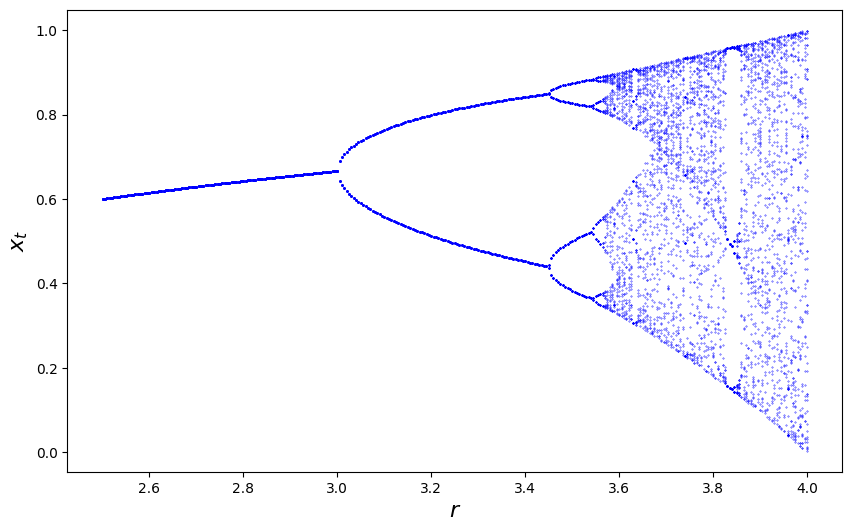

In [24]:
fig, ax = plt.subplots()
ch = Chaos(0.1, 4)
r = 2.5
while r < 4:
    ch.r = r
    t = ch.generate_sequence(1000)[950:]
    ax.plot([r] * len(t), t, 'b.', ms=0.6)
    r = r + 0.005

ax.set_xlabel('$r$', fontsize=16)
ax.set_ylabel('$x_t$', fontsize=16)
plt.show()

### Ex. 8.1

In [25]:
class ECDF:
    def __init__(self, observations):
        self.observations = observations
    def __call__(self,x):
        count = 0.0
        for obs in self.observations:
            if obs <= x:
                count = count + 1
        return count/len(self.observations)

In [35]:
# == test == #

from random import uniform

samples = [uniform(0, 1) for i in range(10)]
F = ECDF(samples)

print(F(0.5))  # Evaluate ecdf at x = 0.5

F.observations = [uniform(0, 1) for i in range(1000)]

print(F(0.5))

0.4
0.492


### Ex. 8.2

In [49]:
class Polynomial:
    def __init__(self,coeff):
        self.coeff = coeff
    def __call__(self,x):
        y = 0
        for i,a in enumerate(self.coeff):
            y += a*(x**i)
        return y
    def differentiate(self):
        new_coefficients = []
        for i, a in enumerate(self.coeff):
            new_coefficients.append(i * a)
        # Remove the first element, which is zero
        del new_coefficients[0]
        # And reset coefficients data to new values
        self.coeff = new_coefficients
        return new_coefficients

In [52]:
P = Polynomial([1,2,3,4,5])
print(P(5))
print(P.differentiate())

3711
[2, 6, 12, 20]


In [2]:
import sympy as sp

class TaylorExpansion:
    def __init__(self, f, a):
        self.f = f  # 要展开的函数
        self.a = a  # 泰勒展开的基点
        self.x = sp.symbols('x')  # 定义符号变量
    
    def expand(self):
        # 计算并返回函数f在点a的5阶泰勒展开式
        expansion = sp.series(self.f(self.x), self.x, self.a, 6).removeO()
        return expansion

# 示例使用
# 定义一个函数
def f(x):
    return sp.exp(x)

# 创建TaylorExpansion实例
te = TaylorExpansion(f, 0)  # 以e^x在x=0处展开为例

# 展开并打印泰勒展开式
print(sp.latex(te.expand()))


\frac{x^{5}}{120} + \frac{x^{4}}{24} + \frac{x^{3}}{6} + \frac{x^{2}}{2} + x + 1
